# SPTcl-IRAGN Cluster Mass--Redshift Plot
## Author: Benjamin Floyd

Generates a publication plot to show the SPTcl-IRAGN sample in the typical SPT $M_{500}$--Redshift plane.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.table import Table

%matplotlib inline
plt.style.use('seaborn-colorblind')

In [2]:
# Read in the SPT cluster catalogs
bocquet = Table.read('Data_Repository/Catalogs/SPT/SPT_catalogs/2500d_cluster_sample_Bocquet18.fits')
huang = Table.read('Data_Repository/Catalogs/SPT/SPT_catalogs/sptpol100d_catalog_huang19.fits')

# Read in the SPTcl-IRAGN catalog
sptcl_iragn = Table.read('Data_Repository/Project_Data/SPT-IRAGN/Output/SPTcl_IRAGN.fits')

In [3]:
# Remove any non-detections from the SPT catalogs and convert the masses to M_sun (rather than 1e14 * M_sun)
bocquet = bocquet[bocquet['M500'] > 0.]
huang = huang[huang['M500'] > 0.]

bocquet['M500'] *= 1e14
huang['M500'] *= 1e14

In [4]:
# Extract the cluster redshifts and masses from SPTcl-IRAGN
sptcl_iragn_clusters = sptcl_iragn[sptcl_iragn.group_by('SPT_ID').groups.indices[:-1]]['SPT_ID', 'M500', 'REDSHIFT', 'MASK_NAME']

# Identify which survey the cluster originated from
sptcl_iragn_clusters_in_2500d = sptcl_iragn_clusters[np.char.find(sptcl_iragn_clusters['MASK_NAME'].astype(str), 'SPT-SZ_2500d') != -1]
sptcl_iragn_clusters_in_100d = sptcl_iragn_clusters[np.char.find(sptcl_iragn_clusters['MASK_NAME'].astype(str), 'SPTpol_100d') != -1]

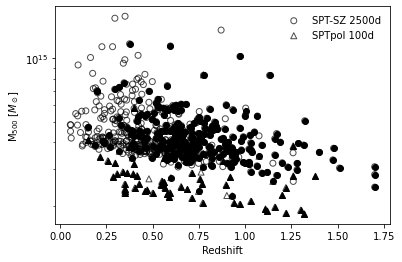

In [11]:
# Make plot
fig, ax = plt.subplots()
ax.scatter(bocquet['REDSHIFT'], bocquet['M500'], marker='o', facecolors='none', edgecolors='k', alpha=0.7, label='SPT-SZ 2500d')
ax.scatter(huang['redshift'], huang['M500'], marker='^', facecolors='none', edgecolors='k', alpha=0.7, label='SPTpol 100d')
ax.scatter(sptcl_iragn_clusters_in_2500d['REDSHIFT'], sptcl_iragn_clusters_in_2500d['M500'], marker='o', facecolors='k')
ax.scatter(sptcl_iragn_clusters_in_100d['REDSHIFT'], sptcl_iragn_clusters_in_100d['M500'], marker='^', facecolors='k')
ax.legend(frameon=False)
ax.set(xlabel='Redshift', ylabel=r'M$_{500}$ [$M_\odot$]', yscale='log')
fig.savefig('Data_Repository/Project_Data/SPT-IRAGN/Publication_Plots/SPTcl-IRAGN_cluster_sample_publication.pdf')
plt.show()